# WeatherPy 
----

#### Analysis 
* The cities located close to the equator tend to experience higher temperatures.

* The cities located close to the equator tend to experience higher humidity. 

* There does not seem to be any correlation between cloudiness, wind velocity and city geolocation.

* Based on the data collected, the cities located on the northern hemisphere experience a wider range of temperatures than those located in the sourthern hemisphere, 

* 70% of the cities are located in the northern hemisphere and 30% in the sourthern hemisphere. This distribution can be explained by the wide temperature ranges experienced in the northern hemisphere where more favorable conditions to live can be found.

In [2]:
# Dependencies and Setup
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from scipy.stats import linregress

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Personal imports.
from pprint import pprint

from matplotlib.ticker import Formatter, FuncFormatter

%matplotlib inline

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# lits for holding the query information and to keep track of the records and sets.
record = 1
Set = 1
city_df = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []

# Creates header of the data retrieval log.
s = "-" * 30
print(f"Beginning Data Retrieval\n{s}")

# For each city in the list of randome cities .
for city in cities:
    # If the record is equal to 50 then reset record to 1 and add 1 to the set.
    if record == 50:
        Set += 1
        record = 1
    # if the record is less than 50 then try.
    try:
        # Query url for each city.
        query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=Imperial&q={city}"
        # Data in json format for each city.
        weather_data = requests.get(query_url).json()

        # Appends data to each of the empty lists created earlier.
        city_df.append(weather_data["name"])
        cloudiness.append(weather_data["clouds"]["all"])
        country.append(weather_data["sys"]["country"])
        date.append(
            pd.to_datetime(weather_data["dt"], unit="s")
        )  # Converts Unix data to datetime
        humidity.append(weather_data["main"]["humidity"])
        lat.append(weather_data["coord"]["lat"])
        lng.append(weather_data["coord"]["lon"])
        maxTemp.append(weather_data["main"]["temp_max"])
        windSpeed.append(weather_data["wind"]["speed"])

        # Prints a log in the command line.
        print(f"Processing Record {record} of set {Set} | {city.title()}")

        # When eveything is done, adds a 1 to the record tally.
        record += 1

    # If data is not found for the desired city, then retur this message.
    except:
        print("City not found. Skipping...")

# End of the log.
print(f"{s}\nData Retrieval Complete\n{s}")

Beginning Data Retrieval
------------------------------
Processing Record 1 of set 1 | Ushuaia
Processing Record 2 of set 1 | Balakovo
Processing Record 3 of set 1 | Carnarvon
Processing Record 4 of set 1 | Butaritari
Processing Record 5 of set 1 | Pathein
Processing Record 6 of set 1 | Christchurch
Processing Record 7 of set 1 | Vaini
Processing Record 8 of set 1 | Chiang Rai
City not found. Skipping...
Processing Record 9 of set 1 | Punta Arenas
Processing Record 10 of set 1 | Cortez
Processing Record 11 of set 1 | Kahului
Processing Record 12 of set 1 | Sayansk
Processing Record 13 of set 1 | Rikitea
Processing Record 14 of set 1 | Codrington
Processing Record 15 of set 1 | Tessalit
Processing Record 16 of set 1 | Avarua
Processing Record 17 of set 1 | Nikolskoye
Processing Record 18 of set 1 | Ichnya
City not found. Skipping...
Processing Record 19 of set 1 | Chuy
Processing Record 20 of set 1 | Mataura
Processing Record 21 of set 1 | Alofi
Processing Record 22 of set 1 | Georgetow

Processing Record 40 of set 4 | Amapa
Processing Record 41 of set 4 | Faanui
Processing Record 42 of set 4 | Bekwai
Processing Record 43 of set 4 | New Kensington
Processing Record 44 of set 4 | Nipawin
Processing Record 45 of set 4 | Klaksvik
Processing Record 46 of set 4 | Trincomalee
Processing Record 47 of set 4 | Katobu
Processing Record 48 of set 4 | Lagoa
Processing Record 49 of set 4 | Vwawa
Processing Record 1 of set 5 | Bethel
Processing Record 2 of set 5 | Kiunga
Processing Record 3 of set 5 | Fortuna
Processing Record 4 of set 5 | Flinders
Processing Record 5 of set 5 | Puri
Processing Record 6 of set 5 | Jadu
Processing Record 7 of set 5 | Shu
Processing Record 8 of set 5 | Constitucion
Processing Record 9 of set 5 | Vila
Processing Record 10 of set 5 | Ribeira Grande
Processing Record 11 of set 5 | Ambatondrazaka
Processing Record 12 of set 5 | Sasovo
Processing Record 13 of set 5 | Camacha
Processing Record 14 of set 5 | Rawson
Processing Record 15 of set 5 | Shenjiamen


Processing Record 38 of set 8 | Katsuura
Processing Record 39 of set 8 | Bowen
City not found. Skipping...
Processing Record 40 of set 8 | Edmundston
Processing Record 41 of set 8 | Camana
Processing Record 42 of set 8 | Neiafu
Processing Record 43 of set 8 | Alappuzha
Processing Record 44 of set 8 | Northam
Processing Record 45 of set 8 | Radom
Processing Record 46 of set 8 | Sao Filipe
Processing Record 47 of set 8 | Cheyenne
Processing Record 48 of set 8 | Hofn
Processing Record 49 of set 8 | Martapura
Processing Record 1 of set 9 | Kenai
Processing Record 2 of set 9 | Conde
Processing Record 3 of set 9 | Pirapozinho
City not found. Skipping...
Processing Record 4 of set 9 | Grindavik
Processing Record 5 of set 9 | Union
Processing Record 6 of set 9 | Neftcala
Processing Record 7 of set 9 | Zyryanskoye
Processing Record 8 of set 9 | Demyansk
Processing Record 9 of set 9 | Port Hedland
Processing Record 10 of set 9 | Gasa
Processing Record 11 of set 9 | Banda Aceh
Processing Record 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Dictionary to store all the lists.
city_dict = {
    "City": city_df,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxTemp,
    "Wind Speed": windSpeed,
}

# Creates DataFrame from the dictionary.
weatherPy_df = pd.DataFrame(city_dict)

# Check for data type.
weatherPy_df.dtypes

City                  object
Cloudiness             int64
Country               object
Date          datetime64[ns]
Humidity               int64
Lat                  float64
Lng                  float64
Max Temp             float64
Wind Speed           float64
dtype: object

In [14]:
# Check for row total.
weatherPy_df.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [15]:
# Format datetime to show only year, month and day.
weatherPy_df["Date"] = weatherPy_df["Date"].dt.strftime("%d-%m-%Y")

weatherPy_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,40,AR,17-06-2020,69,-54.80,-68.30,39.20,0.89
1,Balakovo,0,RU,17-06-2020,78,52.03,47.80,68.11,4.97
2,Carnarvon,40,AU,17-06-2020,100,-24.87,113.63,68.00,5.82
3,Butaritari,20,KI,17-06-2020,77,3.07,172.79,82.47,14.52
4,Pathein,100,MM,17-06-2020,89,16.78,94.73,77.36,4.16


In [16]:
# Csv output.
weatherPy_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude Plots.

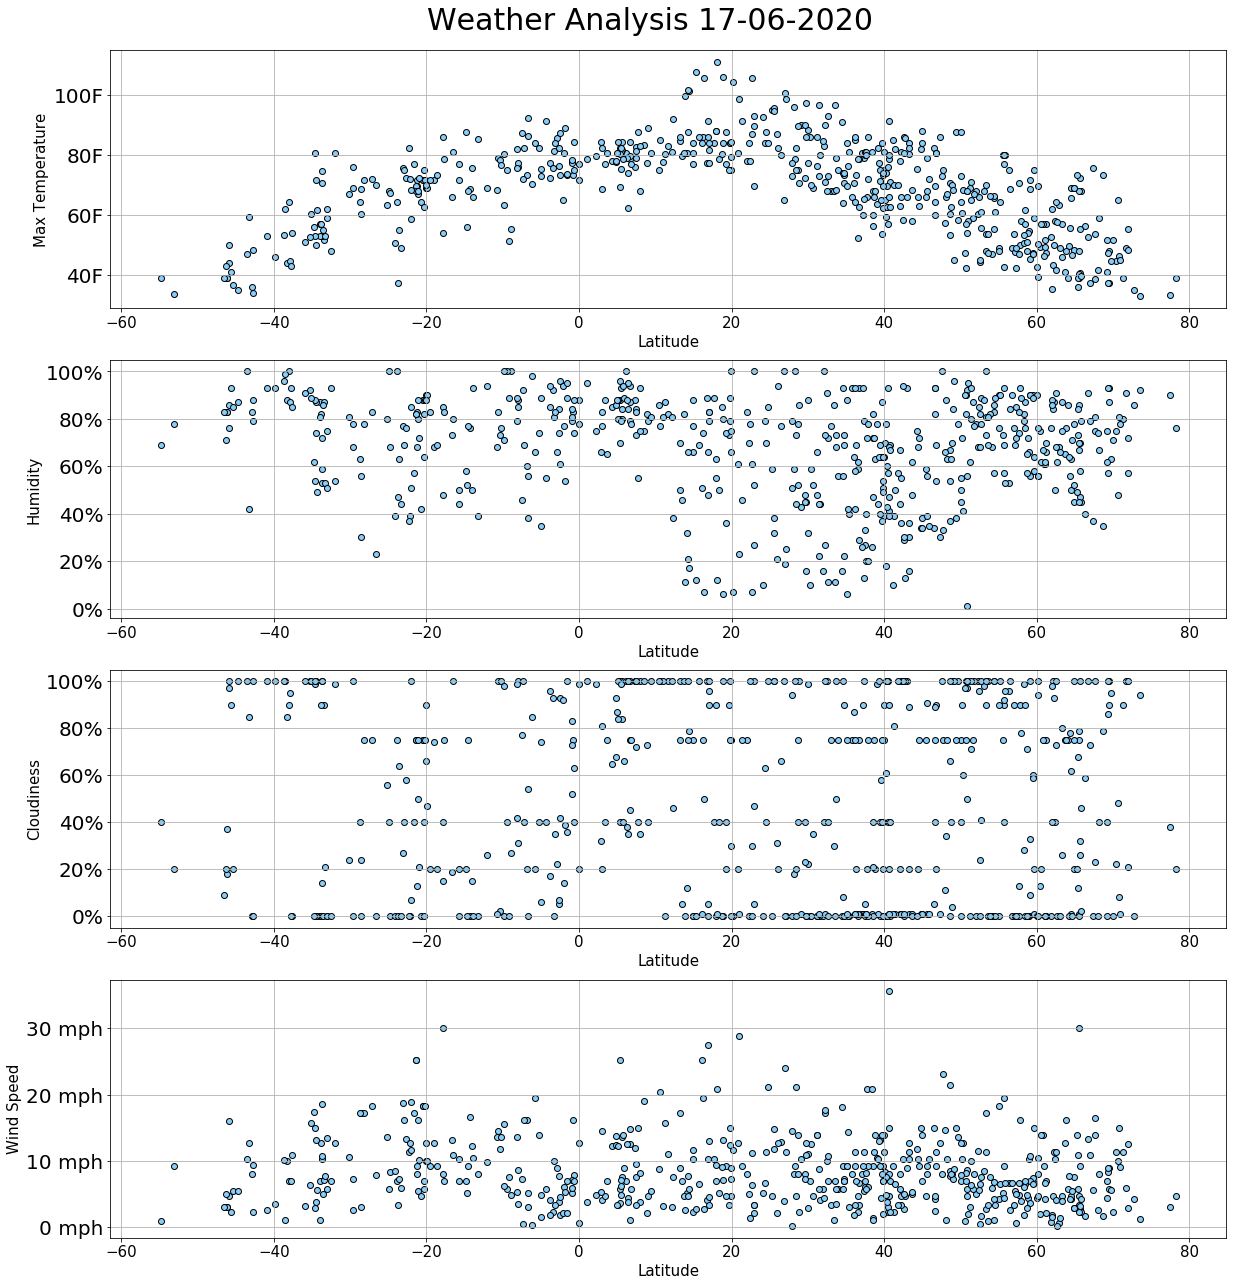

In [18]:
# Takes the data of our query.
date = weatherPy_df.loc[0, "Date"]

# Creates a figure with 4 plots.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20))
fig.subplots_adjust(top=0.95)  # Controls the space between the title and the figure.

# Title of the plot with the date.
fig.suptitle(f"Weather Analysis {date}", fontsize=30)

# Plot 1
ax1.scatter(
    weatherPy_df["Lat"],
    weatherPy_df["Max Temp"],
    facecolors="lightskyblue",
    edgecolors="black",
)
ax1.set_ylabel("Max Temperature", fontsize=15)
ax1.set_xlabel("Latitude", fontsize=15)
ax1.tick_params(axis="y", which="major", labelsize=20)
ax1.tick_params(axis="x", which="major", labelsize=15)
ax1.yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: "{:.0f}F".format(y))
)  # Formats y axis
ax1.grid()

# Plot 2
ax2.scatter(
    weatherPy_df["Lat"],
    weatherPy_df["Humidity"],
    facecolors="lightskyblue",
    edgecolors="black",
)
ax2.set_ylabel("Humidity", fontsize=15)
ax2.set_xlabel("Latitude", fontsize=15)
ax2.tick_params(axis="y", which="major", labelsize=20)
ax2.tick_params(axis="x", which="major", labelsize=15)
ax2.yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: "{:.0f}%".format(y))
)  # Formats y axis
ax2.grid()

# Plot 3
ax3.scatter(
    weatherPy_df["Lat"],
    weatherPy_df["Cloudiness"],
    facecolors="lightskyblue",
    edgecolors="black",
)
ax3.set_ylabel("Cloudiness", fontsize=15)
ax3.set_xlabel("Latitude", fontsize=15)
ax3.tick_params(axis="y", which="major", labelsize=20)
ax3.tick_params(axis="x", which="major", labelsize=15)
ax3.yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: "{:.0f}%".format(y))
)  # Formats y axis
ax3.grid()

# Plot 4
ax4.scatter(
    weatherPy_df["Lat"],
    weatherPy_df["Wind Speed"],
    facecolors="lightskyblue",
    edgecolors="black",
)
ax4.set_ylabel("Wind Speed", fontsize=15)
ax4.set_xlabel("Latitude", fontsize=15)
ax4.tick_params(axis="y", which="major", labelsize=20)
ax4.tick_params(axis="x", which="major", labelsize=15)
ax4.yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: "{:.0f} mph".format(y))
)  # Formats y axis
ax4.grid()

plt.show()

# Saves the plots.
fig.savefig("../output_data/latitudePLots.png")

## Linear Regression

In [19]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weatherPy_df[weatherPy_df["Lat"] >= 0]
south_df = weatherPy_df[weatherPy_df["Lat"] < 0]

# List of the paramters used to compare against latitude.
comparison = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [20]:
# Data distribution.
NorthernPct = len(north_df) / len(weatherPy_df) * 100

NorthernPct

72.7433628318584

In [21]:
# Data distribution.
SouthernPct = len(south_df) / len(weatherPy_df) * 100

SouthernPct

27.256637168141594

####  Northern Hemisphere

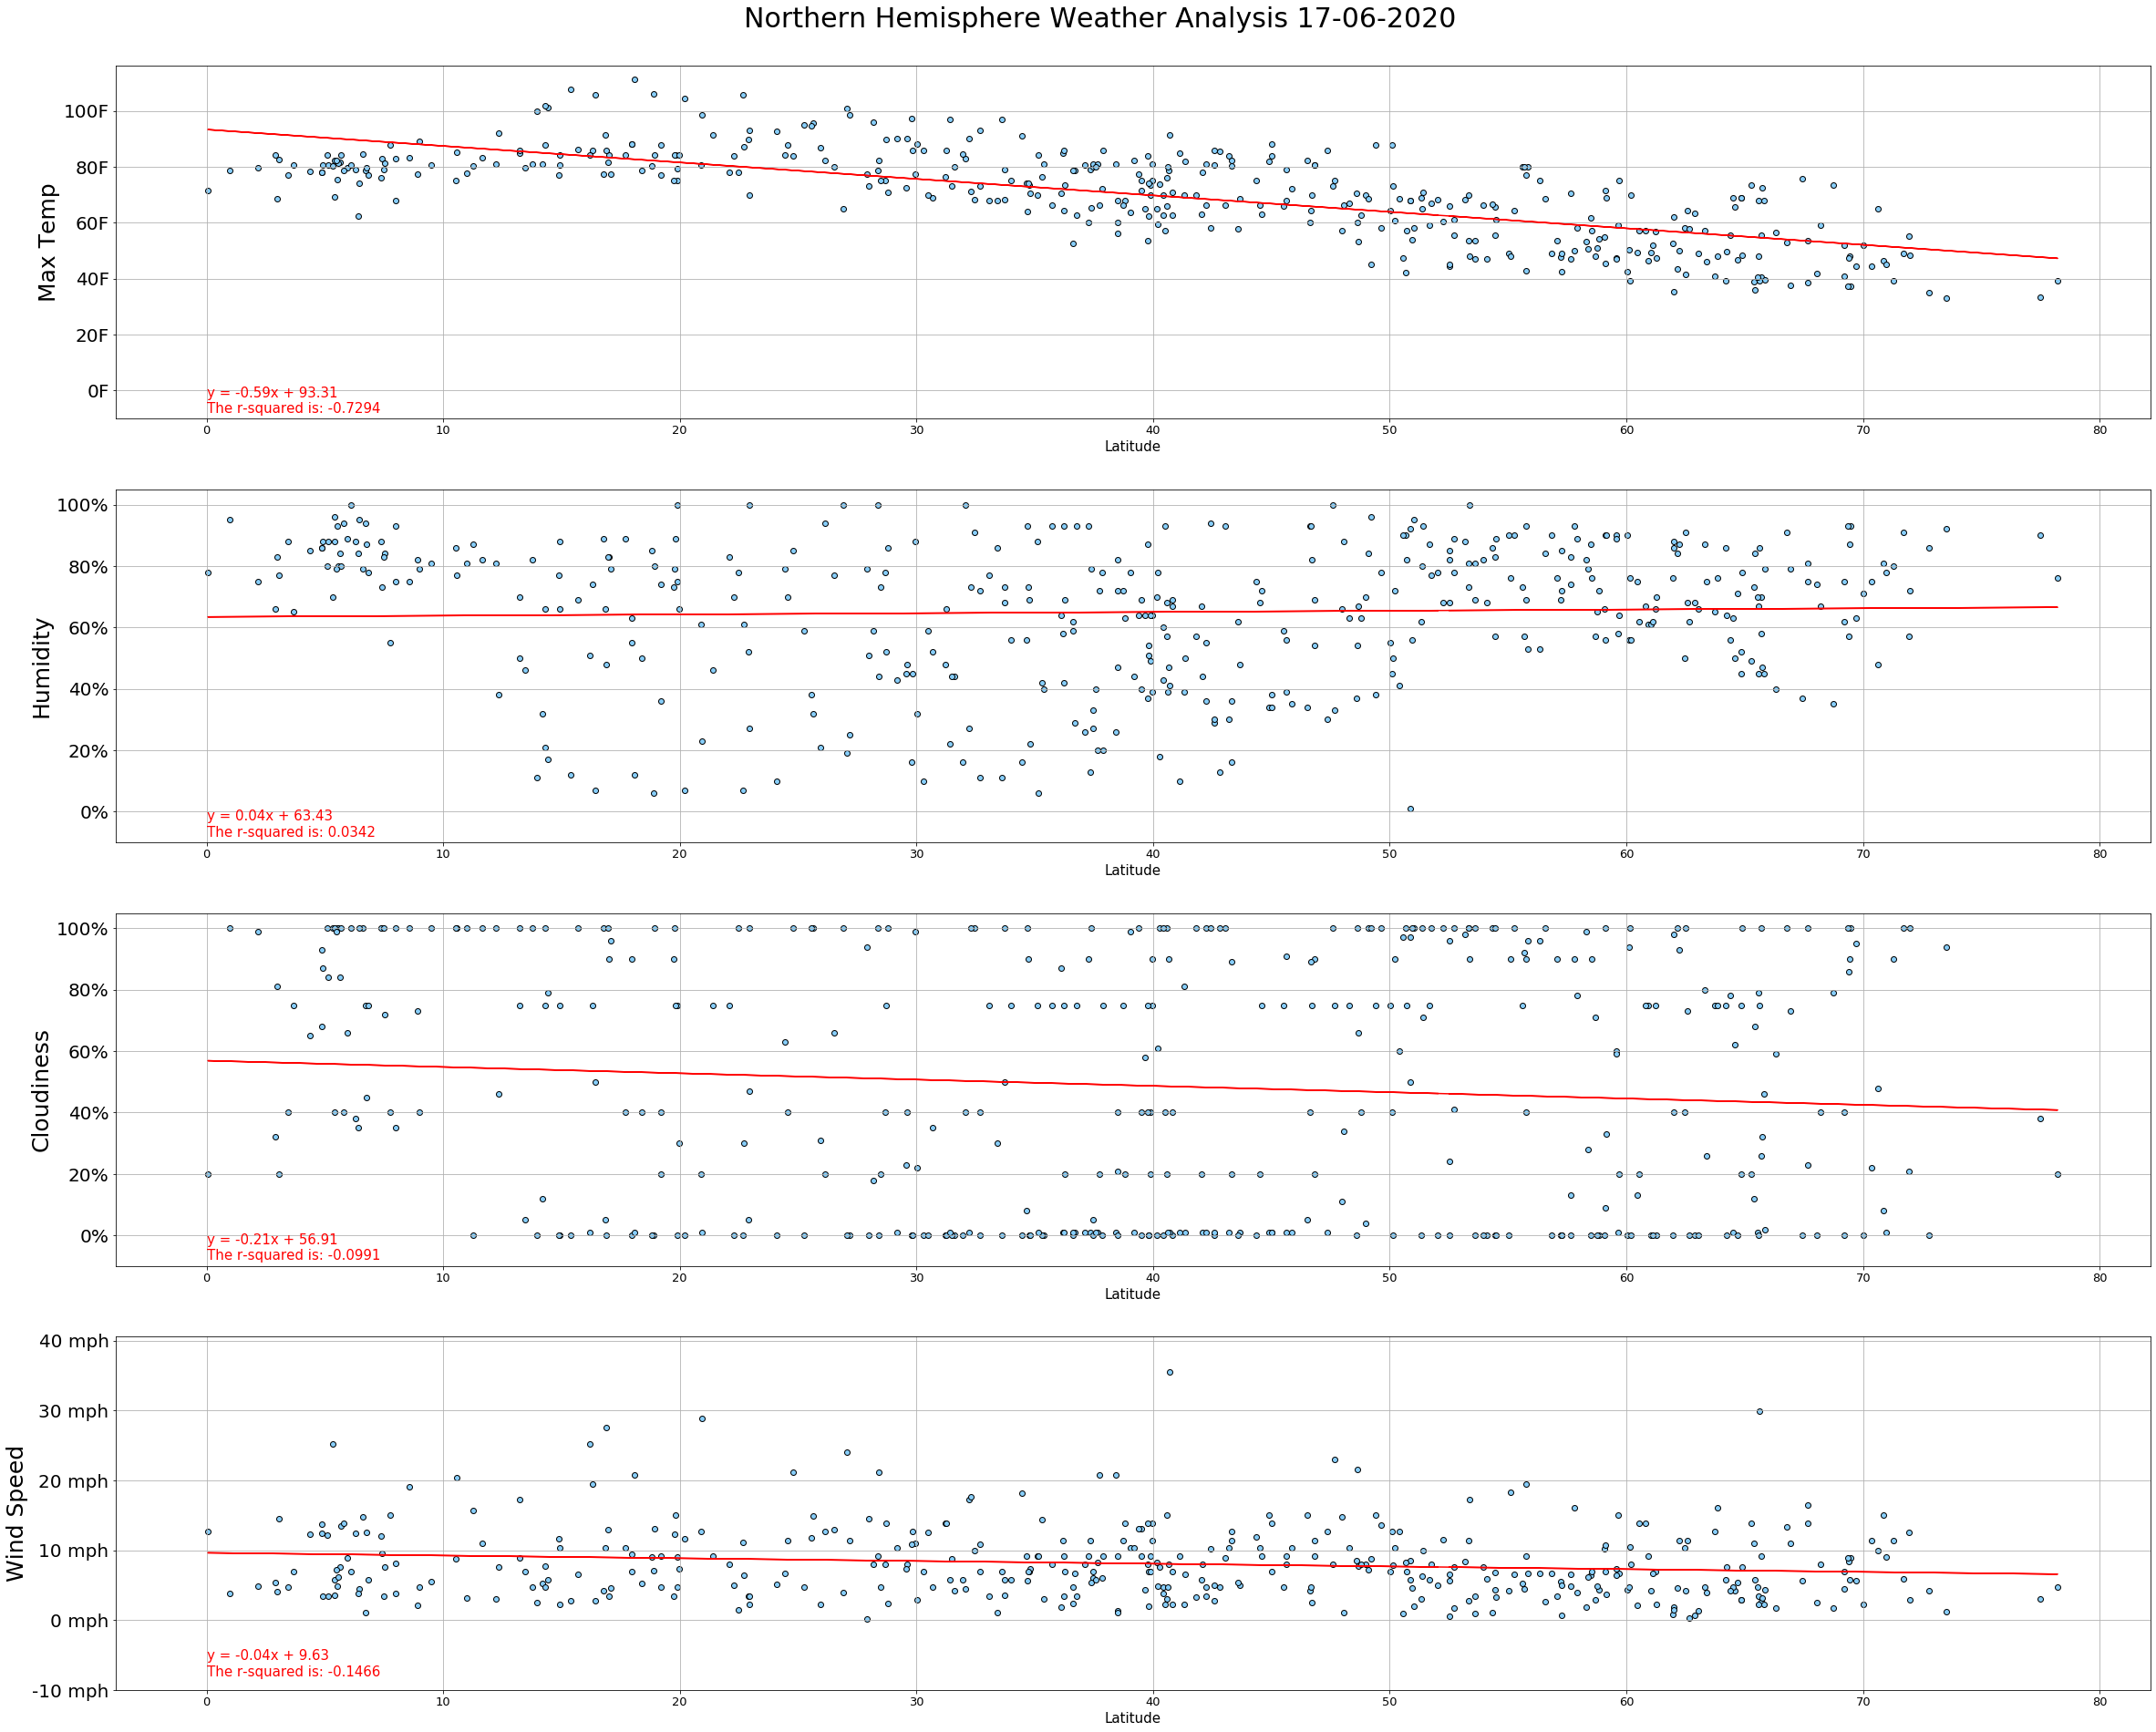

In [22]:
# Date of the query.
date = weatherPy_df.loc[0, "Date"]

# Creates a figure with 4 plots.
fig, axs = plt.subplots(4, 1, figsize=(40, 30))
cols_level = [
    f"ax_{i}" for i in range(len(axs.flat))
]  # 1-D iterator to iterate over the array axs.

# Title
fig.suptitle(f"Northern Hemisphere Weather Analysis {date}", fontsize=30)
fig.subplots_adjust(top=0.95)  # Controls the space between the title and the plots.

# For loop to create plots.
for i, ax in enumerate(axs.flat):
    # Data for the x and y
    x_values = north_df["Lat"]
    y_values = north_df[comparison[i]]

    # Linear regression formula.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # Line equation text and correlation factor.
    line_eq = (
        "y = "
        + str(round(slope, 2))
        + "x + "
        + str(round(intercept, 2))
        + "\nThe r-squared is: "
        + str(round(rvalue, 4))
    )

    # Scatter plot.
    ax.scatter(x_values, y_values, facecolors="lightskyblue", edgecolors="black")

    # Line plot - by plotting points of x values long the regressvalues.
    ax.plot(x_values, regress_values, "r-")
    ax.annotate(
        line_eq,
        (0, -8),  # location of the line_eq
        fontsize=15,
        color="red",
    )

    # label for x and y axis.
    ax.set_xlabel("Latitude", fontsize=15)
    ax.set_ylabel(comparison[i], fontsize=25)

    # lim of y
    ax.set_ylim(-10, north_df[comparison[i]].max() + 5)

    # Creates grid for each plot.
    ax.grid()

    # Selects the format for y based on the plot.
    if comparison[i] == "Max Temp":
        formatAxis = "{:.0f}F"

    elif comparison[i] == "Wind Speed":
        formatAxis = "{:.0f} mph"

    else:
        formatAxis = "{:.0f}%"

    # Applies the format to the y axis.
    ax.set_yticklabels([formatAxis.format(int(x)) for x in ax.get_yticks().tolist()])

    # Controls the size of the x and y ticks.
    ax.tick_params(axis="y", which="major", labelsize=20)
    ax.tick_params(axis="x", which="major", labelsize=13)

plt.show()

# Saves the plot.
fig.savefig("../output_data/NorthernPLots.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

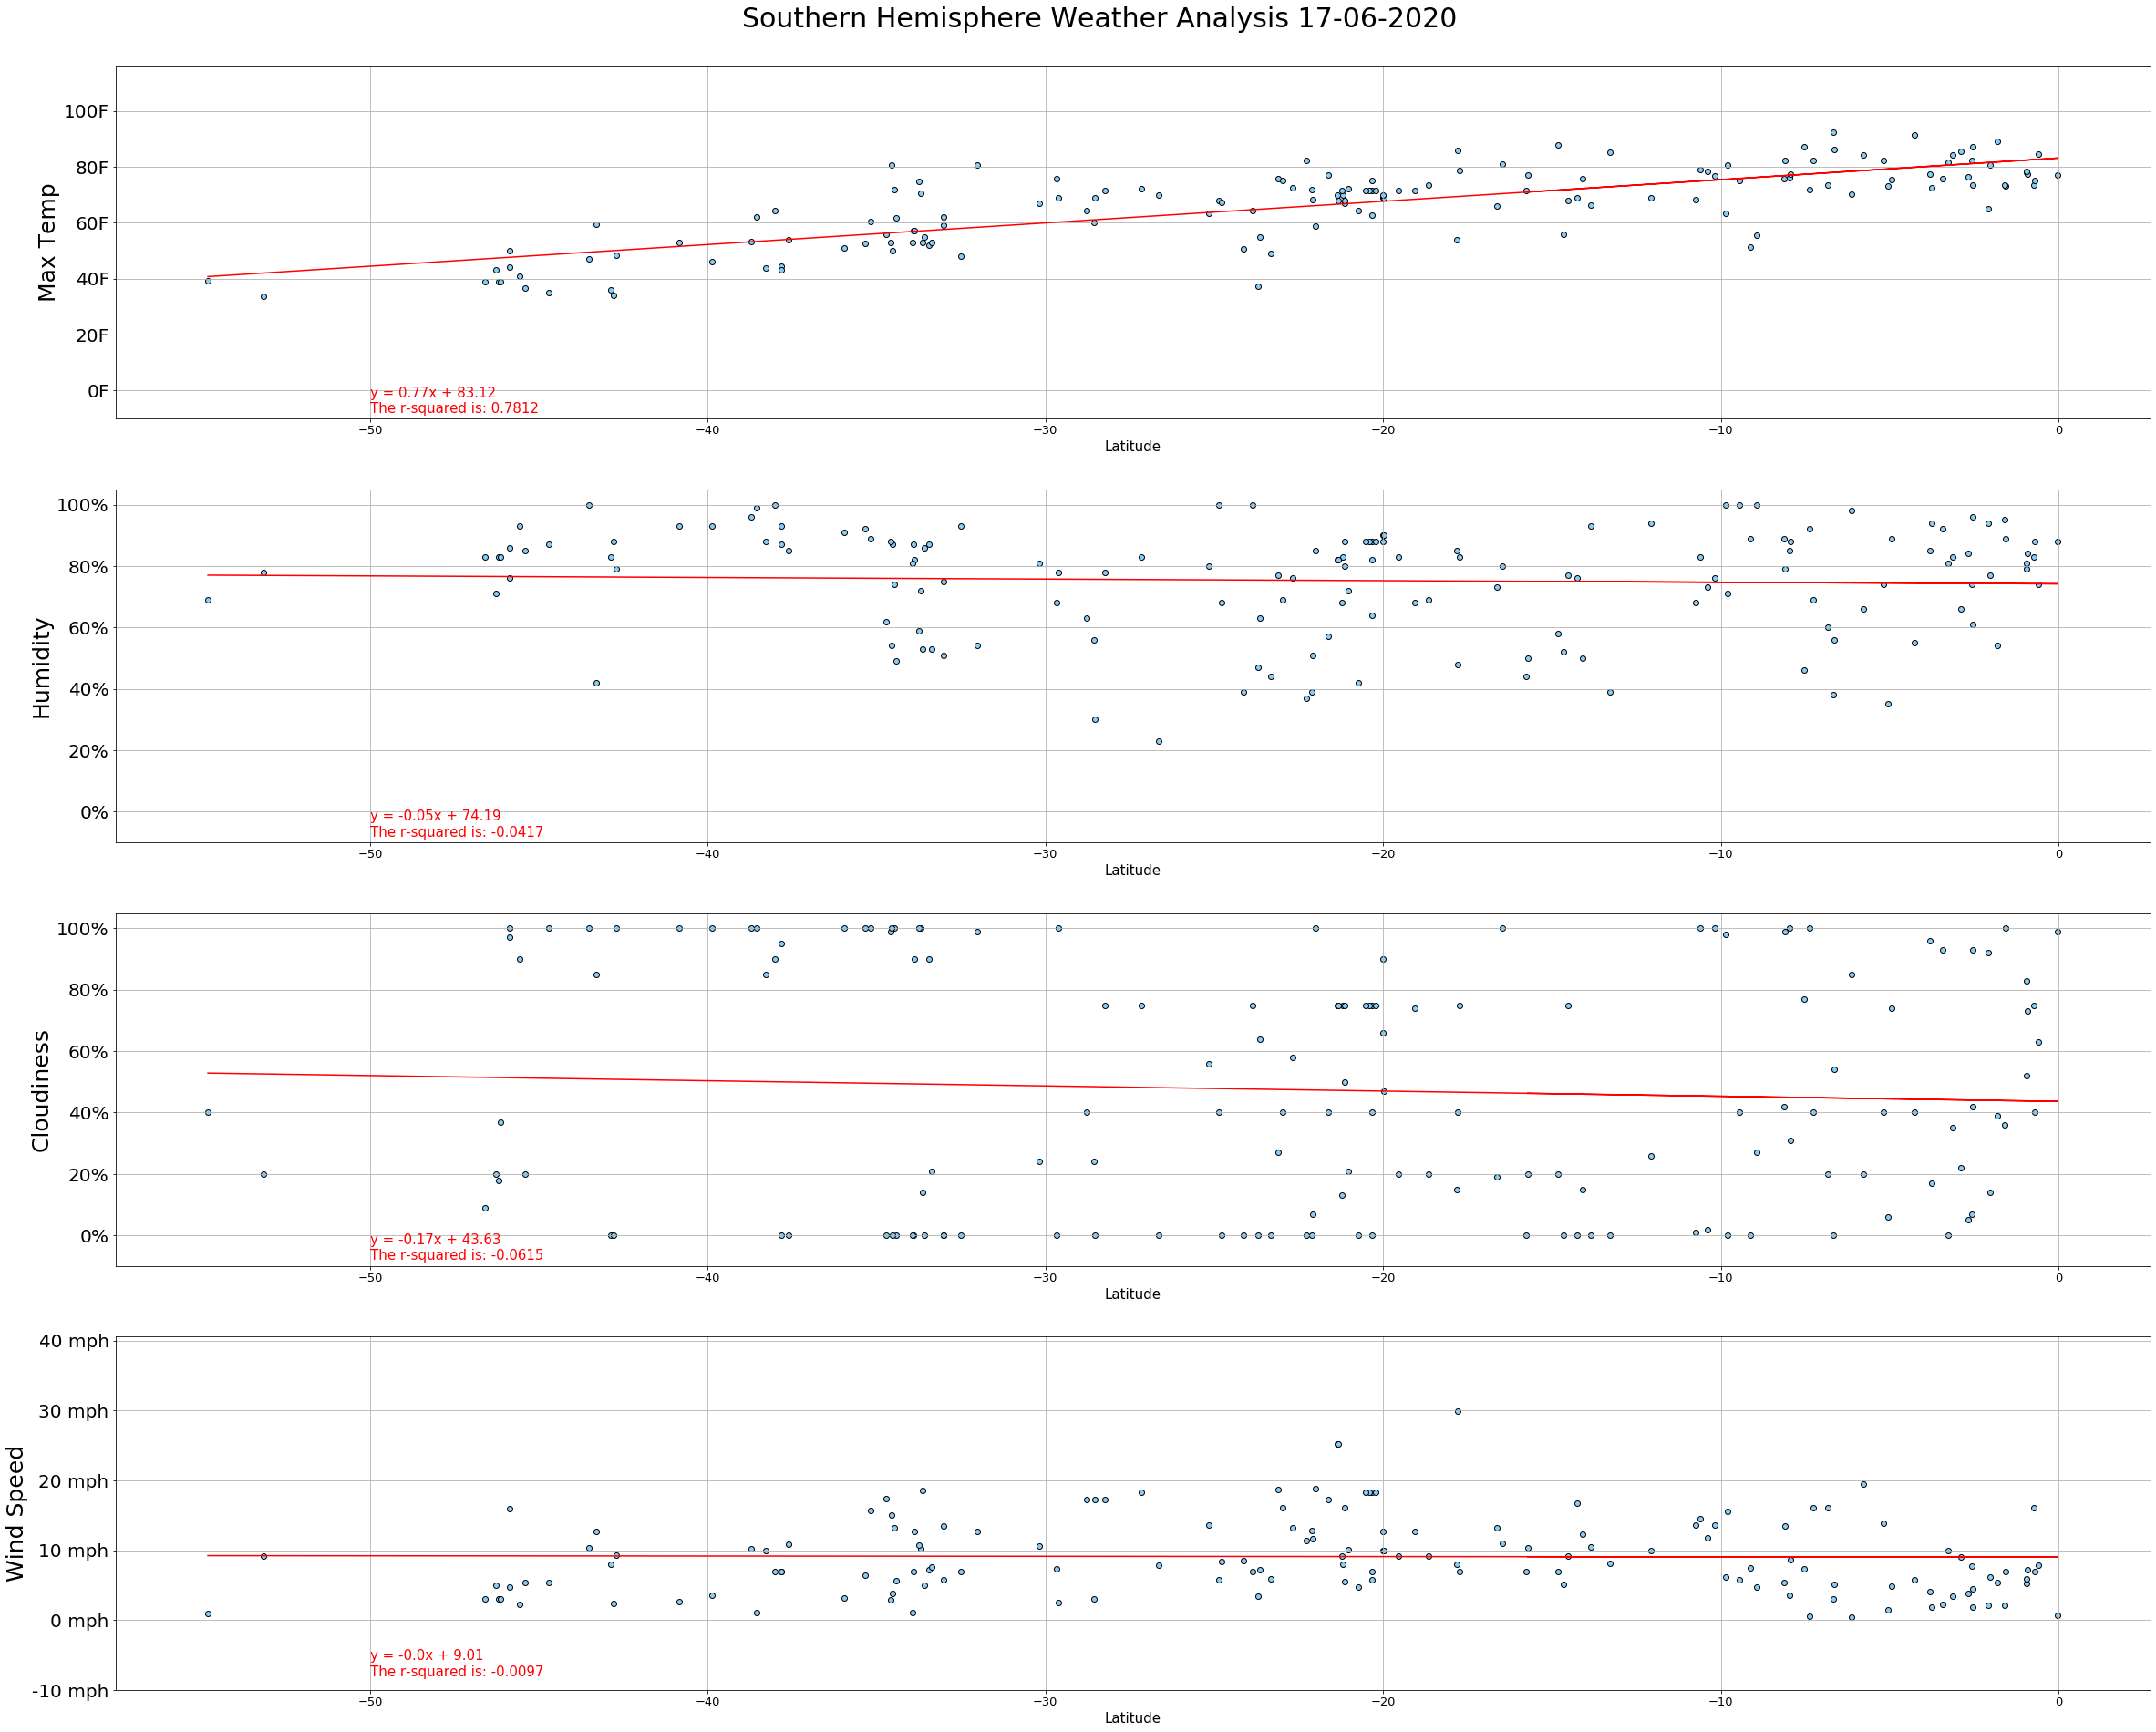

In [24]:
# Date
date = weatherPy_df.loc[0, "Date"]

# Creates a figure with 4 plots.
fig, axs = plt.subplots(4, 1, figsize=(40, 30))
cols_level = [f"ax_{i}" for i in range(len(axs.flat))]

# Title
fig.suptitle(f"Southern Hemisphere Weather Analysis {date}", fontsize=30)
fig.subplots_adjust(top=0.95)

# For loop to create plots.
for i, ax in enumerate(axs.flat):
    # Data for the x and y
    x_values = south_df["Lat"]
    y_values = south_df[comparison[i]]

    # Linear regression formula.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # Line equation text.
    line_eq = (
        "y = "
        + str(round(slope, 2))
        + "x + "
        + str(round(intercept, 2))
        + "\nThe r-squared is: "
        + str(round(rvalue, 4))
    )

    # Scatter plot.
    ax.scatter(x_values, y_values, facecolors="lightskyblue", edgecolors="black")

    # Line plot - by plotting points of x values long the regressvalues.
    ax.plot(x_values, regress_values, "r-")
    ax.annotate(line_eq, (-50, -8), fontsize=15, color="red")
    # label for x and y axis.
    ax.set_xlabel("Latitude", fontsize=15)
    ax.set_ylabel(comparison[i], fontsize=25)

    # lim of y
    ax.set_ylim(-10, north_df[comparison[i]].max() + 5)

    # Grid for each plot.
    ax.grid()

    # Selects the format for y based on the plot.
    if comparison[i] == "Max Temp":
        formatAxis = "{:.0f}F"

    elif comparison[i] == "Wind Speed":
        formatAxis = "{:.0f} mph"

    else:
        formatAxis = "{:.0f}%"

    # Applies the format to the y axis.
    ax.set_yticklabels([formatAxis.format(int(x)) for x in ax.get_yticks().tolist()])

    # Controls the size of the x and y ticks.
    ax.tick_params(axis="y", which="major", labelsize=20)
    ax.tick_params(axis="x", which="major", labelsize=13)

plt.show()

# Saves the plot.
fig.savefig("../output_data/SouthernPLots.png")